# Supplementary Materials
This code accompanies the paper *Asymptotic Convergence of Gradient Descent for Linear Regression Least Squares Optimization* (Lipshitz, 2017)

## Initialization

In [315]:
from pylab import *
from numpy import random as random
random.seed(1)
N=1000.
w = array([14., 30.]); 
x = zeros((2, int(N))).astype(float32)
x[0,:] = arange(N).astype(float32)
x[1,:] = 1
y = w.dot(x) + random.normal(size=int(N), scale=100.)

## Defining Regression 

In [316]:
yh = lambda xs, ws: \
    ws.dot(xs)
    
grad = lambda ys, yhs, xs: \
    (1./xs.shape[1])*sum((yhs-ys)*xs).astype(float32)
    
delta = lambda gs, a: \
    a*gs
    
def regress(y, x, alpha, T=1000):
    wh = random.normal(2, size=2)
    whs = zeros((T, 2))
    whs[0,:] = wh
    for i in xrange(1,T): 
        wh+=delta(grad(y,yh(x,wh), x), alpha)
        whs[i,:] = wh.copy()
    return wh, whs

In [317]:
def regrSample(y, x, alpha, T=1000, N=10):
    out = map(
        lambda a: \
        regress(y,x, alpha, T=T), xrange(N)
    )
    trains = array([o[1] for o in out])
    wDist = array([o[0] for o in out])
    
    return wDist, trains

def statsRegr(*args, **kwargs):
    wDist, trains = regrSample(*args, **kwargs)
    return np.mean(trains, axis=0), np.std(trains, axis=0)

## Running Regression above and Below the Upper Bound on $\alpha$

The theoretically derived bounds on $\alpha$ are $$\alpha \in  \left[ -2\frac{N}{|\mathbf{x}|^2}, -1\right] \cap \left[-\frac{N}{|\mathbf{x}|^2}, 0 \right]$$

Other $\alpha$ values diverge

In [318]:
alphaOver = -10*N/linalg.norm(x[0,:])**2  
alphaUnder = -N/linalg.norm(x[0,:])**2  
muOver, sigOver = statsRegr(y, x, alphaOver, T=T, N=10)
muUnder, sigUnder = statsRegr(y, x, alphaUnder, T=T, N=10)

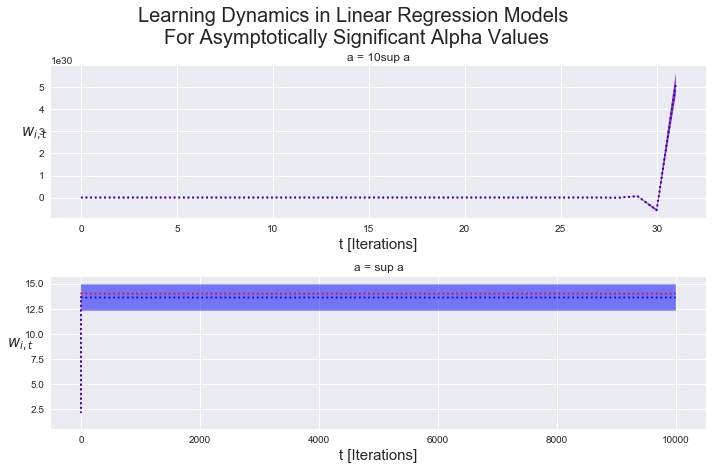

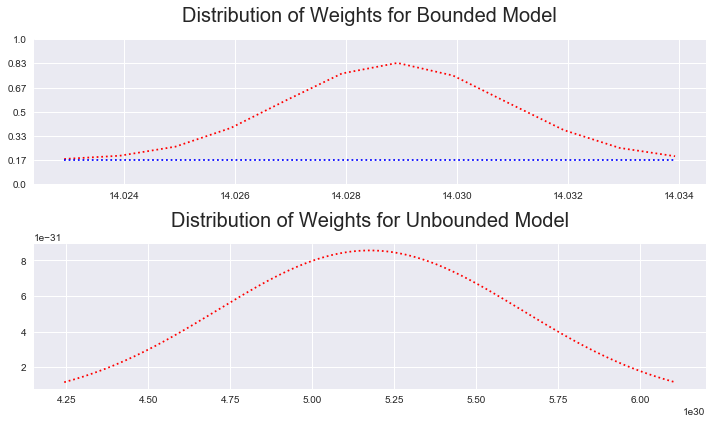

In [324]:
%matplotlib inline
from scipy.stats import norm
import seaborn as sns
fs = 15
t = np.arange(T)
figure(figsize=(10,6))
subplot(2,1,1)
plot(muOver[:,0], 'r:', label='$w_1$')
plot(muOver[:,1], 'b:', label='$w_2$')
fill_between(t, \
             muOver[:,0]+sigOver[:,0], \
             muOver[:,0]-sigOver[:,0], \
             facecolor='red', alpha=0.5)
fill_between(t,\
             muOver[:,1]+sigOver[:,1], \
             muOver[:,1]-sigOver[:,1], \
             facecolor='blue', alpha=0.5)
xlabel("t [Iterations]", fontdict={'fontsize':fs})
yl = ylabel("$w_{i,t}$",fontdict={'fontsize':fs})
yl.set_rotation('horizontal')
title("a = 10sup a")
# title('$a = \frac{N}{\sum x_i^2}$ + 1')

subplot(2,1,2)
plot(muUnder[:,0], 'r:', label='$w_1$')
plot(muUnder[:,1], 'b:', label='$w_2$')
fill_between(t, \
             muUnder[:,0]+sigUnder[:,0],\
             muUnder[:,0]-sigUnder[:,0],\
             facecolor='red', alpha=0.5)
fill_between(t, \
             muUnder[:,1]+sigUnder[:,1],\
             muUnder[:,1]-sigUnder[:,1],\
             facecolor='blue', alpha=0.5)

xlabel("t [Iterations]", fontdict={'fontsize':fs})
yl = ylabel("$w_{i,t}$", fontdict={'fontsize':fs})
yl.set_rotation('horizontal')
plt.title('a = sup a')
# title("$a = 0.06\times\frac{N}{\sum x_i^2}$")
tight_layout()
suptitle(("Learning Dynamics in "
          "Linear Regression Models \n"
          "For Asymptotically Significant Alpha Values"), y=1.08, fontdict={'fontsize':20});

###################################################
figure(figsize=(10,6))
subplot(2,1,1)
mu0 = muUnder[-1,0]
mu1 = muUnder[-1,1]
title("Distribution of Weights for Bounded Model", \
         y=1.08, \
         fontdict={'fontsize':20})

xmin = max(muUnder[-1,0]-3*sigUnder[-1,0], muUnder[-1,1]-3*sigUnder[-1,1])
xmax = min(muUnder[-1,0]+3*sigUnder[-1,0], muUnder[-1,1]+3*sigUnder[-1,1])

x_axis = np.arange(xmin,xmax, 0.001);
plt.plot(x_axis, norm.pdf(x_axis,muUnder[-1,0],sigUnder[-1,0]),'r:');

plt.plot(x_axis, norm.pdf(x_axis,muUnder[-1,1],sigUnder[-1,1]), 'b:');
p, v = yticks()
plt.yticks(p,map(lambda w: round(w, 2),linspace(0, 1, num=len(p))))
subplot(2,1,2)
title("Distribution of Weights for Unbounded Model", \
         y=1.08, \
         fontdict={'fontsize':20})


k=2
idx=argwhere(~np.isnan(muOver[:,0]))[-1]-1
xmin = max(muOver[idx,0]-k*sigOver[idx,0], muOver[idx,1]-k*sigOver[idx,1])
xmax = min(muOver[idx,0]+k*sigOver[idx,0], muOver[idx,1]+k*sigOver[idx,1])
x_axis = np.linspace(xmin,xmax, num=300);

plt.plot(x_axis, \
         norm.pdf(x_axis,muOver[idx,0],sigOver[idx,0]), \
         'r:');


# plt.plot(x_axis, \
#          norm.pdf(x_axis,muOver[idx,1],sigOver[idx,1]), \
#          'b:');

tight_layout()

In [320]:
b = -N/linalg.norm(x[0,:])**2  

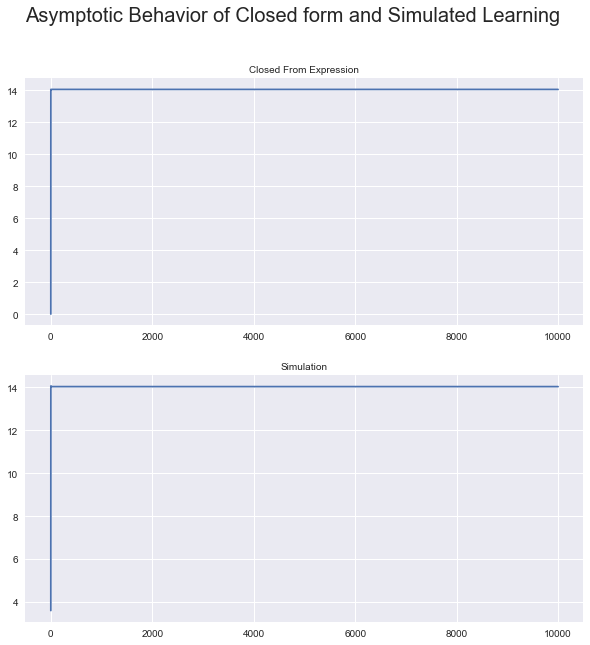

In [328]:
figure(figsize=(10,10))
subplot(2,1,1)
title("Closed From Expression", fontdict={'fontsize':10})

T = 10000
w0 = random.normal(2, size=2)
ws = np.zeros((T,2))
beta2 = (1/N)*b*x[0,:].dot(x[0,:])+1
beta1 = -(1/N)*b*x[0,:].dot(y)
for t in xrange(1,T+1):
    ws[t-1,0] = w0[0]*beta2**t + beta1*(1-beta2**(t-1))/(1-beta2)
plot(ws[:,0])

subplot(2,1,2)
title("Simulation", fontdict={'fontsize':10})
wh = w0
whs = zeros((T, 2))
whs[0,:] = wh
for i in xrange(1,T): 
    wh+=delta(grad(y,yh(x,wh), x), b)
    whs[i,:] = wh.copy()
plot(whs[:,0])
suptitle(("Asymptotic Behavior "
         "of Closed form and Simulated Learning "), fontdict={"fontsize":20})